In [ ]:
from upaths import csv_pattern # track this 
from glob import glob 
import pandas as pd 
from viz1d import lineplot_points, plot_profile_with_esawc


dnames = ['cdem', 'edem','edem_w84','lidar','esawc', 'tdemr','tdemf', 'geometry']

In [5]:
csv_files = glob(csv_pattern)
pnts_csv = csv_files[0]
df = pd.read_csv(pnts_csv)
df.columns = dnames

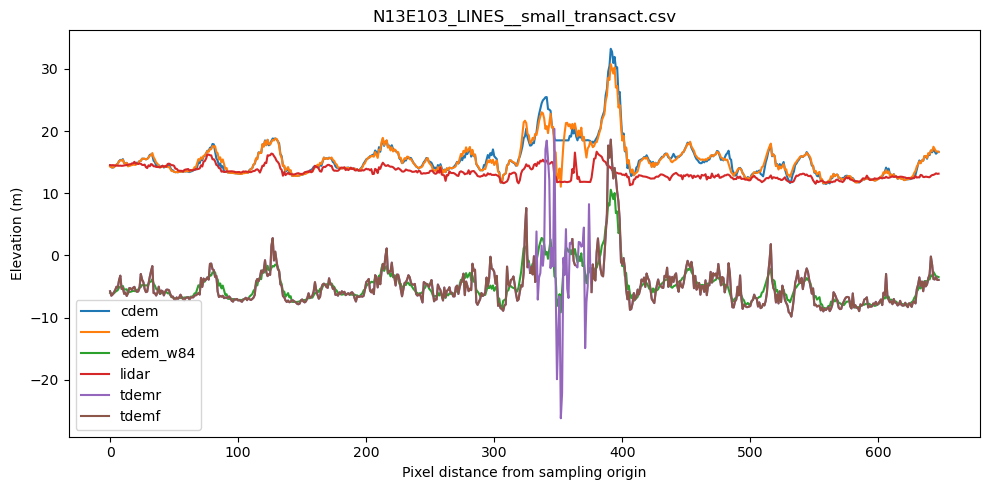

In [6]:
lineplot_points(df,pnts_csv)

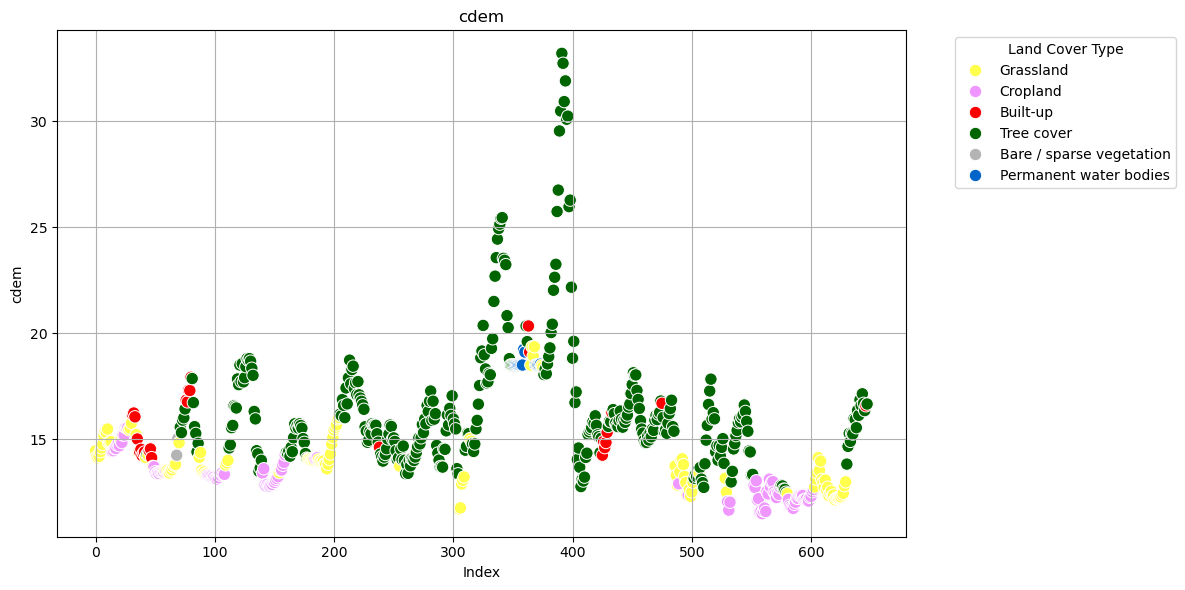

In [8]:
plot_profile_with_esawc(df,pnts_csv,colname='cdem' )

next steps:

In [9]:
# panels:
# 1: MLineProfile + Map2(context, esa)
# 2: MLineProfile + Map2(context, esa,all relevant dems)
# 2: MLineProfile + Map2(context, esa)
# 2: SLineProfile + Maps(context, esa, all relevant dems) 

# ViZ2D

In [4]:
from upaths import test_rpath, test_vpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import GoogleTiles
import geopandas as gpd
import rasterio

In [6]:
def read_dem(rpath):
    with rasterio.open(rpath) as src:
        dem = src.read(1) 
        transform = src.transform  
        crs = src.crs  
    return dem, transform, crs

def raster_extent(dem, transform):
    return [transform[2], transform[2] + transform[0] * dem.shape[1], transform[5] + transform[4] * dem.shape[0], transform[5]]


In [ ]:


places = gpd.read_file(test_vpath)
places = places.to_crs('EPSG:3857') 

# add the option to plot the line or poly here 
def plot_dem_with_context(test_rpath, style='satellite'):
    dem, transform, crs = read_dem(test_rpath)
    extent = raster_extent(dem, transform)
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))
    axarr[0].imshow(dem, cmap='terrain', extent=extent, origin='upper')
    axarr[0].set_title('Digital Elevation Model (DEM)')
    axarr[0].set_xlabel('Longitude')
    axarr[0].set_ylabel('Latitude')

    tiler = GoogleTiles(style=style) #'street' , 'satellite', 'terrain', and 'only_streets'.
    mercator = tiler.crs
    ax2 = fig.add_subplot(1, 2, 2, projection=mercator)
    ax2.set_extent(extent, crs=ccrs.PlateCarree())  # Define region of interest
    ax2.add_image(tiler, 10)  # Add Google satellite basemap

    # Plot places outline on top of the basemap
    #places.boundary.plot(ax=ax2, edgecolor='black', linewidth=2)

    ax2.set_title(f'{style}')
    plt.tight_layout()

# do other basemap too, and stick to this one 
# add default should be Context, DEM ,ESA
# plot shade bg of dem and colormap vmin, vmax, nan.percentile 5,85
# esa use the metadata to graph the color and names to use in the colorbar 


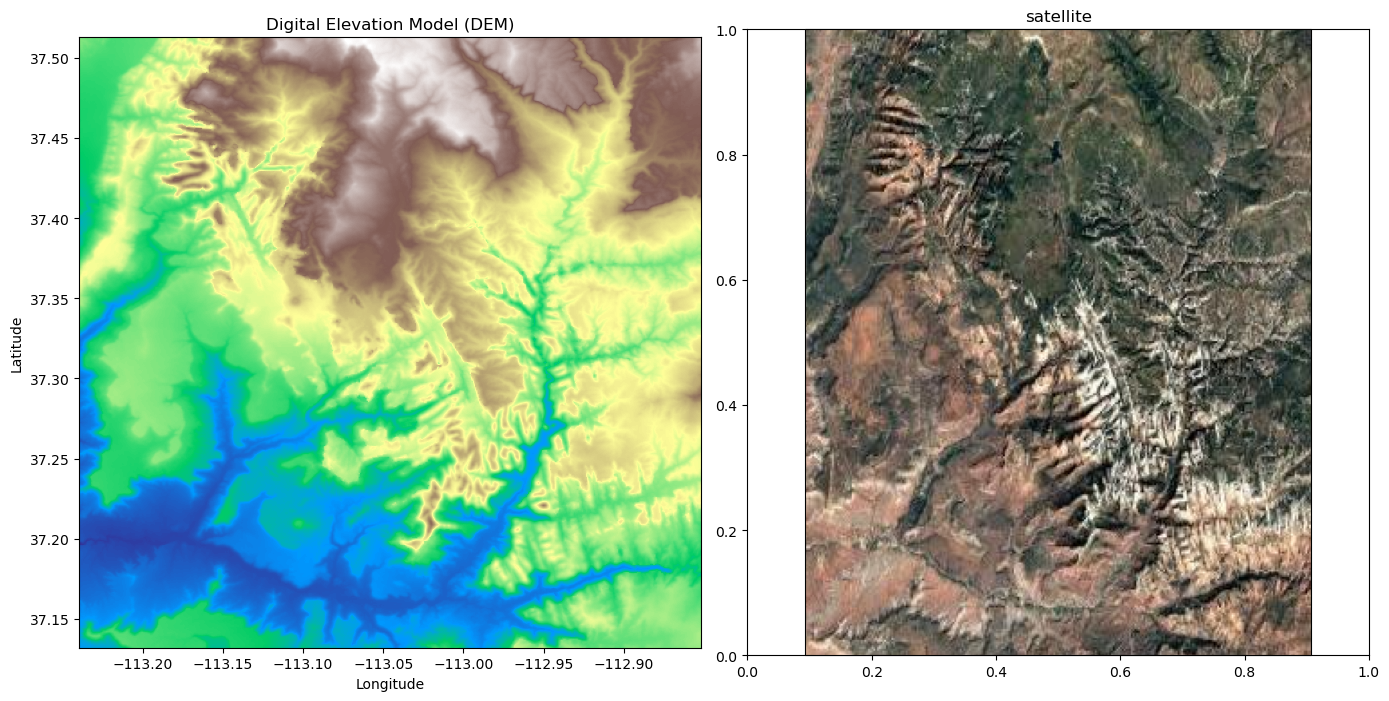

In [9]:
plot_dem_with_context(test_rpath)